***HY473 - Pattern Recognition***

**Assignment 1 - Bayesian Classifier**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv, det

**Question A**

 1. Implement a function that computes the prior probabilities for each class with (0) and without (1) heart disease.

In [33]:
dataset = pd.read_csv('dataset.csv') #first we load the data from the dataset
#we have to count how many samples we have in each class (0) and (1)
target_0 = dataset[dataset['target'] == 0]
target_1 = dataset[dataset['target'] == 1]

count0 = len(target_0)
count1 = len(target_1)

print("Class 0 samples:",count0)
print("Class 1 samples:",count1)


Class 0 samples: 160
Class 1 samples: 137


 We have to compute prior probabilities dy divining count of each class and total samples.



In [34]:
def prior_probabilities():
  P_zero = count0/297 #297 is the total samples
  P_one = count1/297
  return P_zero,P_one

P_zero,P_one = prior_probabilities()
print("Prior probability of class 0:",P_zero)
print("Prior probability of class 1:",P_one)

Prior probability of class 0: 0.5387205387205387
Prior probability of class 1: 0.4612794612794613


2. Compute the posterior probabilities for each sample.


(a) Implement a function that takes as input **one sample** (one point in the 3-dimensional space), **a mean** and **a covariance matrix** and **returns the likelihood** of that point belonging to the class whose distribution is described by the given mean and covariance matrix.

$$
p(\vec{x}) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} e^{-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)}
$$

By applying the formula displayed above, we calculate the likelihood.

In [35]:
d = 3
def likelihood(sample, mean, cov):
    x = sample - mean
    exp = -0.5 * (x.T @ inv(cov) @ x)
    power = np.exp(exp)
    denominator = np.sqrt(((2 * np.pi) ** d) * det(cov))
    p_x = (1 / denominator) * power
    return p_x


(b) Implement a function that computes the posterior probabilities **for each sample**.

The posterior probability is given by:

$$
P(\omega_j | x) = \frac{p(x | \omega_j) \cdot P(\omega_j)}{p(x)}
$$

- $P(\omega_j | x)$ is **Posterior probability**
- $p(x | \omega_j)$ is **Likelihood**
- $P(\omega_j)$ is **Prior probability**
- $P(x)$ is **Evidence**

We already know $$ P(x) =P(x | \omega_0 )P(0) + P(x | \omega_1 )P(1)$$

In [36]:
def posterior_probabilities(sample):
  likelihood_0 = likelihood(sample,means[0],covs[0]) #likelihood for class 0
  likelihood_1 = likelihood(sample,means[1],covs[1]) #likelihood for class 1

  P_x = (likelihood_0 * P_zero) + (likelihood_1 * P_one)
  posterior_0  = (likelihood_0 * P_zero) / P_x
  posterior_1 = (likelihood_1 * P_one) / P_x

  return posterior_0,posterior_1


3. Print the predicted class for each sample, according to the posterior probabilities and then, compute the accuracy of your classifier.

In [37]:
features = ['trestbps', 'thalach', 'chol']
X = dataset[features].values #we have to extract features to pass them in the classifier
y = dataset['target'].values # for the accuracy

In [38]:
#this code is from the given params.txt
means = [
    [129.175, 158.58125, 243.49375], # Means of class 0 for features ['trestbps', 'thalach','chol']
    [134.635,139.109, 251.854 ]      # Means of class 1 for features ['trestbps', 'thalach','chol']
]

covs = [
    # Conv of class 0 for features (3x3) ['trestbps', 'thalach','chol']
    [
        [268.107547,    6.067453,    91.076572],
        [6.067453,  362.647445,    19.535102],
        [91.076572,   19.535102,  2889.874175]
    ],

    # Conv of class 1 for features (3x3) ['trestbps', 'thalach','chol']
    [
        [357.086410,    7.047606,   133.166917],
        [7.047606,  515.774689,    65.310219],
        [133.166917,   65.310219,  2468.096179]
    ]
]


Now we calculate the posterior probabilities and determine which one is higher to make the prediction. **If the posterior probability of class 0 is higher**, the **prediction is 0** (does not have heart disease). **Otherwise**, the **prediction is 1** (has heart disease).

In [39]:
predictions = []
results = []

for sample in X:
    posteriors = posterior_probabilities(sample)
    if posteriors[0] > posteriors[1]:
      predicted_class = 0
    else:
      predicted_class = 1

    predictions.append(predicted_class)

    results.append([sample, posteriors[0], posteriors[1], predicted_class])

print("Sample | Post for 0 | Post for 1 | Predicted")
for result in results:
    print(f"{result[0]} | {result[1]:.2f} | {result[2]:.2f} | {result[3]}")

accuracy = np.mean(np.array(predictions) == y)
print(f'Classifier Accuracy: {accuracy * 100}%')


Sample | Post for 0 | Post for 1 | Predicted
[145 150 233] | 0.54 | 0.46 | 0
[160 108 286] | 0.04 | 0.96 | 1
[120 129 229] | 0.37 | 0.63 | 1
[130 187 250] | 0.82 | 0.18 | 0
[130 172 204] | 0.81 | 0.19 | 0
[120 178 236] | 0.82 | 0.18 | 0
[140 160 268] | 0.64 | 0.36 | 0
[120 163 354] | 0.75 | 0.25 | 0
[130 147 254] | 0.57 | 0.43 | 0
[140 155 203] | 0.66 | 0.34 | 0
[140 148 192] | 0.60 | 0.40 | 0
[140 153 294] | 0.57 | 0.43 | 0
[130 142 256] | 0.51 | 0.49 | 0
[120 173 263] | 0.79 | 0.21 | 0
[172 162 199] | 0.45 | 0.55 | 1
[150 174 168] | 0.80 | 0.20 | 0
[110 168 229] | 0.79 | 0.21 | 0
[140 160 239] | 0.66 | 0.34 | 0
[130 139 275] | 0.46 | 0.54 | 1
[130 171 266] | 0.76 | 0.24 | 0
[110 144 211] | 0.60 | 0.40 | 0
[150 162 283] | 0.58 | 0.42 | 0
[120 160 284] | 0.71 | 0.29 | 0
[132 173 224] | 0.79 | 0.21 | 0
[130 132 206] | 0.41 | 0.59 | 1
[120 158 219] | 0.73 | 0.27 | 0
[120 172 340] | 0.78 | 0.22 | 0
[150 114 226] | 0.10 | 0.90 | 1
[150 171 247] | 0.67 | 0.33 | 0
[110 114 167] | 0.22 | 0.78

We can see that the accuracy of my classifier is **68.68%** which is **low**. This happens because the original dataset has 14 features and for the assignment we take only the 3 of them. So, r**educing the number of features** also **reduce the amount of information** available for the classifier to make accurate predictions.



**Question B**

1. Compute the **conditional risk** for every sample.

The conditional risk is calculated using the **loss function** and **posterior probabilities**.

The risk for class i ( 0 or 1) is computed using this formula: $$ R(i|x) = \sum_{j}λ(i,j)P(j|x)$$

- λ(i,j) is **cost** of class i when the **real class is j**
- P(j|x) is the **posterior probability** of class j given x.

First, we have to define a loss matrix. My loss matrix is  $$λ=
 \begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}$$ this means that:
- if predicting class 0 when the true class is 1 there's a loss of 1.
- if predicting class is 1 when the true class is 0 there's a loss of 1.
- if its correct there's no loss.

In [40]:
loss_matrix = np.array([[0, 1],[1, 0]])
conditional_risks = []

for sample in X:
    posterior_0, posterior_1 = posterior_probabilities(sample)
    risk_0 = loss_matrix[0, 0] * posterior_0 + loss_matrix[0, 1] * posterior_1  # P(1|x)
    risk_1 = loss_matrix[1, 0] * posterior_0 + loss_matrix[1, 1] * posterior_1  # P(0|x)

    conditional_risks.append((risk_0, risk_1))

print("Sample | Risk for class 0 | Risk for class 1")
for i, (risk_0, risk_1) in enumerate(conditional_risks):
    print(f"{X[i]} | {risk_0:.2f} | {risk_1:.2f}")


Sample | Risk for class 0 | Risk for class 1
[145 150 233] | 0.46 | 0.54
[160 108 286] | 0.96 | 0.04
[120 129 229] | 0.63 | 0.37
[130 187 250] | 0.18 | 0.82
[130 172 204] | 0.19 | 0.81
[120 178 236] | 0.18 | 0.82
[140 160 268] | 0.36 | 0.64
[120 163 354] | 0.25 | 0.75
[130 147 254] | 0.43 | 0.57
[140 155 203] | 0.34 | 0.66
[140 148 192] | 0.40 | 0.60
[140 153 294] | 0.43 | 0.57
[130 142 256] | 0.49 | 0.51
[120 173 263] | 0.21 | 0.79
[172 162 199] | 0.55 | 0.45
[150 174 168] | 0.20 | 0.80
[110 168 229] | 0.21 | 0.79
[140 160 239] | 0.34 | 0.66
[130 139 275] | 0.54 | 0.46
[130 171 266] | 0.24 | 0.76
[110 144 211] | 0.40 | 0.60
[150 162 283] | 0.42 | 0.58
[120 160 284] | 0.29 | 0.71
[132 173 224] | 0.21 | 0.79
[130 132 206] | 0.59 | 0.41
[120 158 219] | 0.27 | 0.73
[120 172 340] | 0.22 | 0.78
[150 114 226] | 0.90 | 0.10
[150 171 247] | 0.33 | 0.67
[110 114 167] | 0.78 | 0.22
[140 151 239] | 0.42 | 0.58
[117 160 230] | 0.26 | 0.74
[140 158 335] | 0.38 | 0.62
[135 161 234] | 0.30 | 0.70
[13

2. Print the predicted class for each sample, in order to minimize the conditional risk. What is the accuracy now? Comment on what do you notice and why.

In [41]:
new_predictions = []

for risk_0, risk_1 in conditional_risks:
    if risk_0 < risk_1:
        predicted_class = 0
    else:
        predicted_class = 1
    new_predictions.append(predicted_class)

new_accuracy = np.mean(np.array(new_predictions) == y)

print("Sample | Risk for 0 | Risk for 1 | Predicted Class")
for i, (risk_0, risk_1) in enumerate(conditional_risks):
    print(f"{X[i]} | {risk_0:.2f} | {risk_1:.2f} | {new_predictions[i]}")

print(f'New Classifier Accuracy: {new_accuracy * 100:.2f}%')
print(f'Previous Accuracy: {accuracy * 100:.2f}%')


Sample | Risk for 0 | Risk for 1 | Predicted Class
[145 150 233] | 0.46 | 0.54 | 0
[160 108 286] | 0.96 | 0.04 | 1
[120 129 229] | 0.63 | 0.37 | 1
[130 187 250] | 0.18 | 0.82 | 0
[130 172 204] | 0.19 | 0.81 | 0
[120 178 236] | 0.18 | 0.82 | 0
[140 160 268] | 0.36 | 0.64 | 0
[120 163 354] | 0.25 | 0.75 | 0
[130 147 254] | 0.43 | 0.57 | 0
[140 155 203] | 0.34 | 0.66 | 0
[140 148 192] | 0.40 | 0.60 | 0
[140 153 294] | 0.43 | 0.57 | 0
[130 142 256] | 0.49 | 0.51 | 0
[120 173 263] | 0.21 | 0.79 | 0
[172 162 199] | 0.55 | 0.45 | 1
[150 174 168] | 0.20 | 0.80 | 0
[110 168 229] | 0.21 | 0.79 | 0
[140 160 239] | 0.34 | 0.66 | 0
[130 139 275] | 0.54 | 0.46 | 1
[130 171 266] | 0.24 | 0.76 | 0
[110 144 211] | 0.40 | 0.60 | 0
[150 162 283] | 0.42 | 0.58 | 0
[120 160 284] | 0.29 | 0.71 | 0
[132 173 224] | 0.21 | 0.79 | 0
[130 132 206] | 0.59 | 0.41 | 1
[120 158 219] | 0.27 | 0.73 | 0
[120 172 340] | 0.22 | 0.78 | 0
[150 114 226] | 0.90 | 0.10 | 1
[150 171 247] | 0.33 | 0.67 | 0
[110 114 167] | 0.78 

The accuracy **stays the same** because our classifier already used Bayes decision rule, which **picks the class with the highest** posterior probability. Minimizing **risk with a 0-1 loss matrix does the same thing**, so predictions and accuracy don’t change. If we used a different loss matrix, predictions and accuracy might change.

**Question C**

1. Create a 2D scatter plot using only the features [’trestbps’, ’thalach’], showing the distribution of each class.
2. Additionally, plot the decision boundary of your classifier.

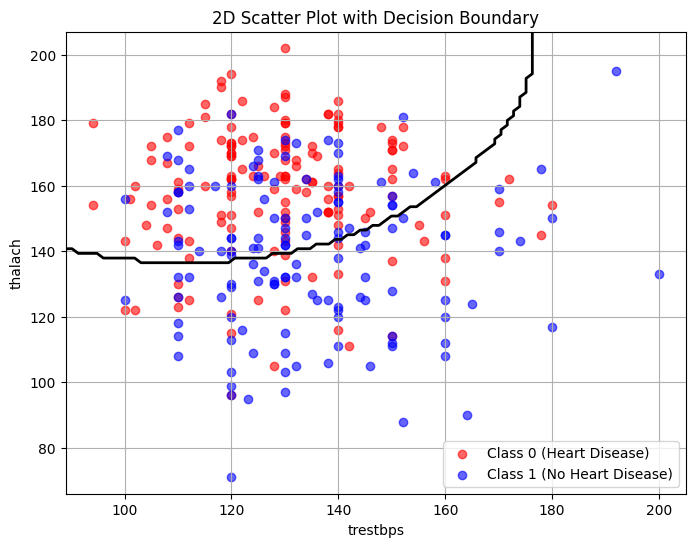

In [42]:
features = ['trestbps', 'thalach']
X = dataset[features].values
y = dataset['target'].values

means = np.array([[129.175, 158.58125],[134.635,139.109]])

covs = np.array([[[268.107547, 6.067453], [6.067453, 362.647445]],[[357.086410, 7.047606], [7.047606, 515.774689]]])

x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = np.array([posterior_probabilities(np.array([x, y]))[1] > 0.5 for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0 (Heart Disease)', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1 (No Heart Disease)', alpha=0.6)


plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

plt.xlabel('trestbps')
plt.ylabel('thalach')
plt.title('2D Scatter Plot with Decision Boundary')
plt.legend()
plt.grid(True)

plt.show()


The plot shows the data **isn’t easily separable**. Using just resting blood pressure and max heart rate doesn’t clearly divide people with and without heart disease. The decision boundary tries to split the space, but both classes still mix on either side. This means these two features alone aren’t enough for accurate classification.